Explore the GitHub API


In [48]:
import requests #set http request to github
import json #used to interpret results by github
from pprint import pprint # pretty print
import matplotlib.pyplot as plt # plotting
import logging # error handling
import yaml # import (optional) yaml file
import os.path

# retrieve secrets
from google.colab import userdata
token = userdata.get('ghtoken')

## Parameters ##
# check if config.yml exists. If not, use default of 20
parameter_file_name = "config.yml" # by default searches for "config.yml"

if os.path.isfile(parameter_file_name):
  with open(parameter_file_name, "r") as yaml_f:
    try:
        top_n_yaml = yaml.safe_load(yaml_f)
        top_n = top_n_yaml['top_n'] # by default expects 'top_n' as key
    except yaml.YAMLError as exc:
        print(exc)
else:
  top_n=20 # default top_n value

# parameter check
try:
  str(top_n).isnumeric()
except ValueError:
  logging.error(f'Parameter top_n must be integer! {top_n} provided')

if top_n > 20:
  logging.warning(f'When parameter top_n is > 20 the plot may not be legible')


# construct API request #
#https://docs.github.com/en/rest/search/search?apiVersion=2022-11-28#search-users
url = 'https://api.github.com/search/repositories?q=followers:>1000&order=desc'  #works
headers = {'Authorization': 'Bearer ' + token}

# retrieve using requests
r = requests.get(url, headers=headers)
r_json = json.loads(r.text) # .text to access response content


In [49]:
## data explorations ##
#browse to view data structure
for key, value in r_json.items():
  print('{}: {}'.format(key, value))
#print first x entries
pprint(r_json['items'][:top_n])

total_count: 45037
incomplete_results: False
items: [{'id': 28457823, 'node_id': 'MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==', 'name': 'freeCodeCamp', 'full_name': 'freeCodeCamp/freeCodeCamp', 'private': False, 'owner': {'login': 'freeCodeCamp', 'id': 9892522, 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjk4OTI1MjI=', 'avatar_url': 'https://avatars.githubusercontent.com/u/9892522?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/freeCodeCamp', 'html_url': 'https://github.com/freeCodeCamp', 'followers_url': 'https://api.github.com/users/freeCodeCamp/followers', 'following_url': 'https://api.github.com/users/freeCodeCamp/following{/other_user}', 'gists_url': 'https://api.github.com/users/freeCodeCamp/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/freeCodeCamp/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/freeCodeCamp/subscriptions', 'organizations_url': 'https://api.github.com/users/freeCodeCamp/orgs', 'repos_url': 'https://api.github.com/users/freeCod

In [52]:
## retrieve data ##
# retrieve name and counts in separate lists
repo_name = []
repo_counts = []
for item in r_json['items'][:top_n]:
  repo_name.append(item['name'])
  repo_counts.append(item['stargazers_count'])

#print results
for r, c in zip(repo_name,repo_counts):
  print(f"{r} ({c})")

freeCodeCamp (380973)
free-programming-books (306370)
awesome (284280)
coding-interview-university (274701)
public-apis (274083)
996.ICU (268325)
developer-roadmap (262478)
system-design-primer (241563)
build-your-own-x (237105)
react (216944)
vue (206077)
awesome-python (193269)
tensorflow (179835)
javascript-algorithms (179014)
Python (174526)
You-Dont-Know-JS (174090)
CS-Notes (169685)
bootstrap (166370)
ohmyzsh (165614)
awesome-selfhosted (163672)
linux (163551)
flutter (159057)
AutoGPT (155974)
computer-science (155676)
vscode (154642)
gitignore (154291)
project-based-learning (147765)
Python-100-Days (145179)
the-art-of-command-line (142770)
javascript (139886)


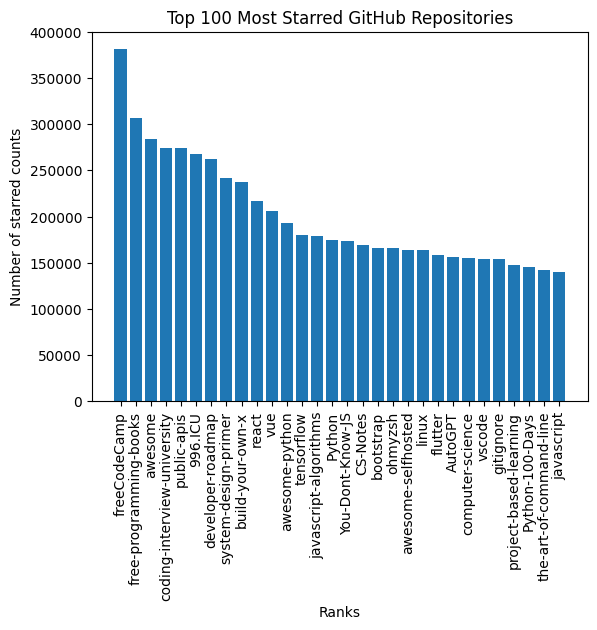

In [51]:
## plot ##
# Plot bar chart
plt.bar(repo_name, repo_counts)
plt.title(f"Top {top_n} Most Starred GitHub Repositories")
plt.ylabel("Number of starred counts")
plt.xlabel("Ranks")
plt.xticks(rotation=90)
plt.show()